# Module 4: Normal distribution and other continuous distributions

## Outline
* Continuous probability distributions: a reminder
* Normal distribution
    * Standard normal distribution
    * 68-95-99 rule
    * Reproducible properties
    * Constructing pdfs to data
    * Central limit theorem
* Normal approximations to other distributions
    * Poisson distribution
* Other relevant distributions
    - Lognormal distribution
    - Chi square distribution
    - Student t distribution
    - F distribution
    - Extreme value distributions


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Continuous probability distributions: a reminder
###### From discrete to continuous distributions
Most geoscientific variables can take on any of a continuum of values. Even though the nature of measurement and reporting systems is such that measurements are rounded to discrete values, the set of reportable values is large enough that most such variables can still be treated as continuous quantities.
In the empirical probability distribution, you may reduce the bin width and get more and more bins. This shape approximates a curve, which can in some cases be described by parametric functions.
**Probability density functions, $f(x)$, are the continuous parametric analogs of the familiar histogram.**

###### Properties of probability distributions
* In contrast to the discrete case (where $pmf$ gives probabilities), continuous distributions need a range for the probability: $P(X=a)=0$
* Probability is proportional to area, and not to height
    - $P(a \leq X \leq b)$ is the area under the curve from $a$ to $b$
* The area under the curve = 1, i.e. $\int_{-\infty}^{\infty} f(x) dx = 1$
* The function never evaluates negative, that is $f(x) \geq 0$
* Moments are used to characterize $pdf$s
    - For example: $E(X) = \int_{-\infty}^\infty {x \cdot f(x)dx}$

## The normal distribution (Gaussian)

The normal distribution curve (density function) is given as:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}}\exp(\frac{-(x-\mu)^2}{2 \sigma^2})$$

Which parameters does it require? How do they change the curve?

* Symmetric, bell shaped, continuous
* A common notation is $N(\mu,\sigma^2)$
* It's a good approxmiation for many other distributions, both discrete and continuous
* It has many applications, especially to describe processes that are the result of many, many small procsses (e.g. to model the error in a measurement)
    - As the sample size becomes large, the sum (or, equivalently the arithmetic mean) of a set of observations following any distribution will have a Gaussian sampling distribution.

How do we read off any percentiles from this curve, for instance the 90th percentile?
The answer is: we can't. The 90th percentile is the x value up to which the area under the curve is 0.9.

We may plot the distribution in a different way to make it easier to read off percentiles:
The cumulative distribution function, or CDF.
(The normal cdf is not given as a formula because the integral of $f(x)$ is not analytically solvable.)

### Examples

We'll start by generating some artificial data to demonstrate some characteristics of the Normal distribution.

In [15]:
np.random.normal(loc=100, scale=10, size=2)

array([ 99.10106084, 110.06038579])

<IPython.core.display.Javascript object>


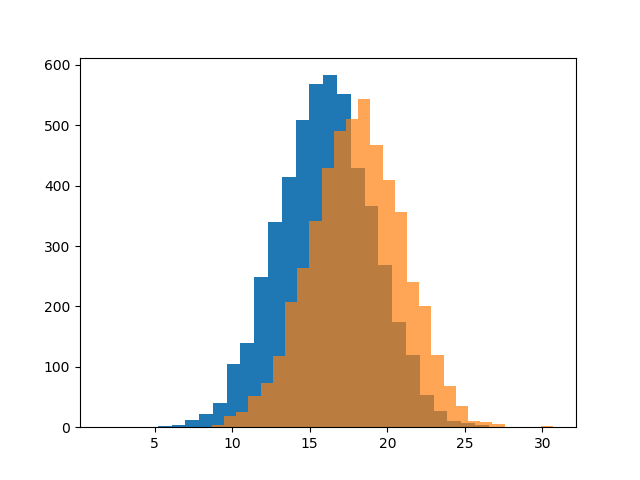

In [16]:
# Change the mean to 18
rv1 = np.random.normal(loc=16, scale=3, size=5000)
rv2 = np.random.normal(loc=18, scale=3, size=5000)

h=plt.hist(rv1,bins=30)
h=plt.hist(rv2, alpha = 0.7,bins=30)

What have we plotted above? What names would you give to the axes?

<IPython.core.display.Javascript object>


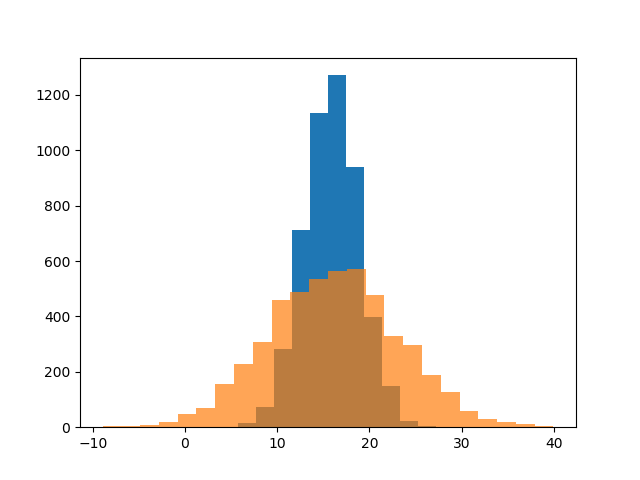

In [17]:
# Change the standard deviation to 5
rv1 = np.random.normal(loc=16, scale=3, size=5000)
rv3 = np.random.normal(loc=16, scale=7, size=5000)

h=plt.hist(rv1, bins = 12)
h=plt.hist(rv3, bins = 24, alpha = 0.7)

<IPython.core.display.Javascript object>


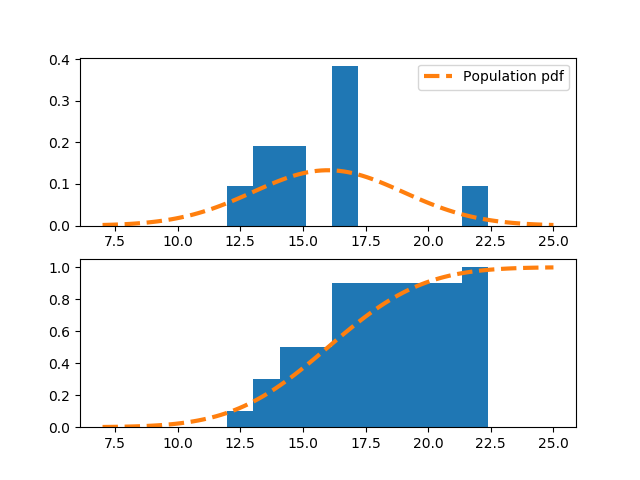

In [21]:
# Plot the normal distribution curve and check how our generated sample fit the curve

population_mean = 16
population_std = 3
samplesize=10

rv1 = np.random.normal(loc=population_mean, scale=population_std, size=samplesize)

fig=plt.figure()
ax1=fig.add_subplot(211) #for pdfs
ax2=fig.add_subplot(212, sharex=ax1) #for cdfs

ax1.hist(rv1, normed = True)
ax2.hist(rv1, normed = True, cumulative=True)

# To plot the underlaying Gaussian, we use the stats package
x = np.linspace(population_mean-3*population_std,population_mean+3*population_std,100)
ax1.plot(x, stats.norm.pdf(x, population_mean, population_std), '--', linewidth=3, label='Population pdf')
ax1.legend()

ax2.plot(x, stats.norm.cdf(x, population_mean, population_std), '--', linewidth=3)


# Does the curve fit the data? Try increasing the sample size

## Standard normal distribution

Because $f(x)$ is not analytically integrable, we use a table of probabilities to find the integral up to a value x. This table is developed for the case when the normal distribution has $\mu=0$ and $\sigma=1$, commonly written as $N(0,1)$, that is

$$f(z) = \frac{1}{\sqrt{2 \pi}}\exp(\frac{-z^2}{2})$$

This is called the **standard normal distribution**, and we replace x with _z_ whenever we use it.

If your data is normally distributed with different $\mu$ and $\sigma$, transform it into the standard normal by subtracting $\mu$ from all data, and dividing by $\sigma$. Note that this is a linear transformation, therefore the resulting distributions stays a normal distribution (see reproductive properties below).

* Note that whatever physical units characterize $x$ will cancel in this transformation, so that the standardized variable, $z$, is always dimensionless

Then look up in the table: https://en.wikipedia.org/wiki/Standard_normal_table#Cumulative
If needed, transform you data back to what they were.

Due to the symmetry of the normal distribution, negative Z values can be transformed to positives, e.g.:
$$ P(Z< -0.67) = 1-P(Z<0.67)$$

#### Example 4.3 in the compendium

The annual maximum discharge in a river is normally distributed, having mean = 10m$^3$/s and standard deviation = 3 m$^3$/s.

**(a)** What is the probability that in any given year the annual maximum discharge is less than 8 m$^3$/s?

First, standardize:

$$\frac{8-\mu}{\sigma}$$

insert values

$$\frac{8-10}{3} = -2/3 = -0.67 $$

The Z value corresponding to 8 m$^3$/s is -0.67.

When we look up in the table, we see that Z = -0.67 corresponds to a probability of 0.251.
Thus, the probability that the annual maximum discharge is less than 8 m$^3$/s is 25 %.

**(b)** What is the probability that the discharge is between 8 and 13 m$^3/s$?

$$P(8 < x < 13) = $$

## The 68-95-99 rule, or the empirical rule
For normal distributions,
* 68 % of the observations fall within 1 standard deviation around the mean
* 95 % of the observations fall within 2 standard deviations around the mean
* 99 % of the observations fall within 3 standard deviations around the mean

This property can be used to justify the use of the normal distribution even if the hydrological variable is bounded by x = 0. See example 4.1 in the compendium. $\mu$ = 600, $\sigma$ = 100.

$Z = \frac{0 - 600}{100} = -6$

What does this result tell us?

However, if the there is a physical limit on the left that is relatively near the range of the data (e.g., precipitation amount, wind speed), these variables often follow distinctly skewed distributions.

* Although it is mathematically possible to fit Gaussian distributions in such situations, the results are generally not useful.

## Reproductive properties

If a random variable $X$ is $N(\mu, \sigma^2)$ and $Y=a+bX$, the distribution of $Y$ can be shown to be $N(a+b\mu, b^2\sigma^2)$.

If $X_i$ for $i=1,2,...,n$ are independently and normally distributed with mean $\mu_i$ and variance $\sigma^2_i$, then $Y=a+b_1 X_1 + b_2 X_2 + ...+b_n X_n$ is normally also distributed, with mean and variance:

$$\mu_Y=a+\sum_{i=1}^n b_i \mu_i$$

$$\sigma^2_Y=\sum_{i=1}^n b_i^2 \sigma^2_i$$

Applying the above properties, prove that if a random observation of $X \sim N(\mu,\sigma^2)$ then its mean $\overline{X} \sim N(\mu, \sigma^2/n)$.
In lecture 2, we've shown that the variance of the mean of a random sample similarly decreases with 1/n.

Any linear function of independent normal random variabces is also a normal random varibale.


<IPython.core.display.Javascript object>


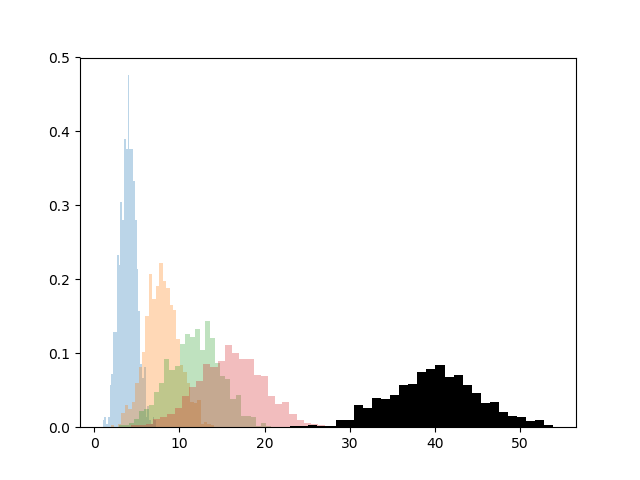

In [22]:
#summing up normal random variables

Y=0
for i in range(1,5):
    Xi = np.random.normal(loc=i*4., scale=i, size=1000)
    h=plt.hist(Xi, normed=True, alpha=0.3, bins=30)
    Y=Y + Xi

h=plt.hist(Y, normed=True, bins=30, color='k')

<IPython.core.display.Javascript object>


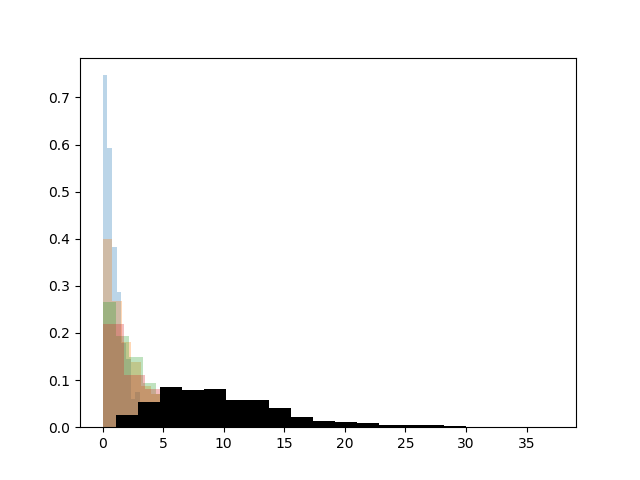

In [26]:
#Now the interesting bit: sums of random variables with different distributions

Y=0
for i in range(1,5):
    #Xi=np.random.uniform(low=i-0.3, high=i+0.3, size=1000)
    
    #Xi=np.random.triangular(left=i-0.3,mode=i, right=2*i,size=1000)
    
    Xi=np.random.exponential(scale=i, size=1000)
    
    h=plt.hist(Xi, normed = True,alpha=0.3,bins=20)
    Y=Y + Xi

h=plt.hist(Y, normed = True,bins=20,color='k')
#plt.yscale('log')


## Central limit theorem

This is the theorem that explains the above observations: many distributions found in nature are close to the normal distribution.

Let $X_1, X_2, ... X_n$ be independent, identically distributed (need not be normal) random variables with mean $\mu$ and nonzero variance $\sigma^2$.
Then $S_n=X_1+X_2+...+X_n$ is normally distributed with mean $n \mu$ and variance $n\sigma^2$.

** This is a natural law of our universe (so it's maybe not unexpected that $e$ and $\pi$ show up in the formula of the Gaussian). **

"[T]he central limit theorem allows us to use normal probability calculations to answer questions about sample means (read: monthly or annual averages) even when the population distribution (read: daily data) is not normal" (Moore and McCabe, Introduction to the practice of statistics)

The sum (or average) of a variable is normally distributed when $n$ gets large:
$\bar{X} = (X_1 + X_2 + ... + X_n)$  is approximately normally distributed.

* Summing daily temperatures to obtain a monthly averaged temperature is a good example of this situation

## Normal approximations to other distributions

As a result of the central limit theorem, many distributions approach the normal distribution under certain conditions. The hypergeometric, binomial and poisson distributions approach normal when $n$ becomes large. Here, we may use a _continuous_ distribution to find approximate probabilities for _discrete_ distributions. This is very useful, because it is relatively simple to find probabilities for the standard normal distribution.


### Poisson distribution
In the Poisson distribution, we have one parameter: $\lambda$
$$f_x(x; \lambda) = {\lambda^x\over x!} e^{-\lambda} $$

$$\mu = \lambda$$
$$\sigma =\sqrt{\lambda}$$


<IPython.core.display.Javascript object>


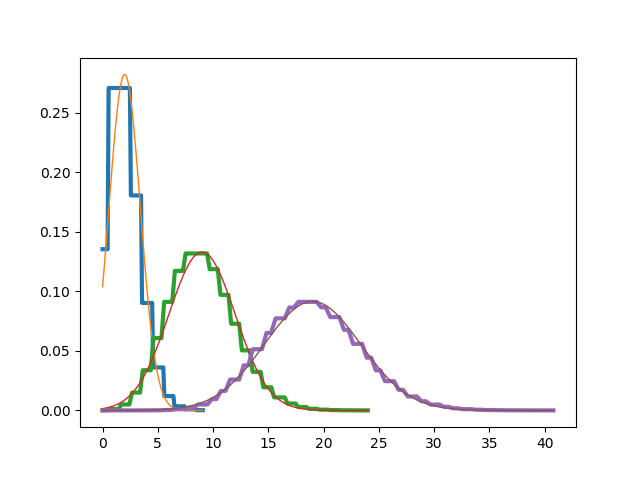

In [28]:
# Example 4.7 of the compendium:
# Approximate the Poisson by the normal and plot the normal approximations on the same graph.

for my_lambda in [2.,9.,19.]:

    my_mean = my_lambda
    my_std = np.sqrt(my_lambda)

    x = np.linspace(0,my_mean+5*my_std,100)
    plt.plot(x,stats.poisson.pmf(np.round(x),my_lambda), linewidth=3)
    
    plt.plot(x,stats.norm.pdf(x,my_mean,my_std), linewidth=1)


## Lognormal distribution
The next distribution we'll go through is not a discrete distribution like the binomial and poisson.
The lognormal distribution is used when the observations are not normally distributed, but when the _logarithm_ of the observations are normally distributed.

Let X be a product now, i.e.
$$X=X_1 X_2 ... X_n$$

And let
$$Y=ln(X)=ln(X_1 X_2 ... X_n)= ln(X_1)+ln(X_2)+ ...+ ln(X_n)$$

From the Central Limit Theorem, $Y$ can be expected to be normaly distributed, and
$X$ is said to be log-normally distributed.

In [ ]:
#a small dataset bound by zero
data= [ 0.71072454,  0.71846493,  4.29146796,  2.09924604,  1.31196252,
        4.49477261,  1.37587157,  0.78523017,  0.62258151,  0.70103625,
        2.63455406,  1.10565614,  1.69745302,  2.43672108,  0.38072637,
        1.58180993,  1.13462547, 11.89731016,  0.32140571,  1.64997998]

plt.hist(data, normed=True)

In [ ]:
#you may suspect a log-normal distribution
log_data = np.log(data)

plt.hist(log_data, normed=True)

x = np.linspace(np.mean(log_data)-3*np.std(log_data), np.mean(log_data)+3*np.std(log_data),100)
plt.plot(x, stats.norm.pdf(x,np.mean(log_data), np.std(log_data)))

# If "log_data" is normally distributed, we say that "data" is lognormally distributed

Note, however,
* The lognormal distribution is sometimes somewhat arbitrarily assumed for positively skewed data.
* In particular, the lognormal too frequently is used without checking whether a different power transformation might produce more nearly Gaussian behavior.

## Chi square distribution ($\chi^2$)
Up until now, we've looked at the distribution of sums or averages ($\bar{X}$) of random variables.

This next distribution is used to find the distribution of the sum of squares ($X^2$).
It is among other things used in calculating confidence interval of variance and testing goodness-of-fit (Chi-square test, cf. lecture 7).

If $X_1, X_2, ..., X_n$ are **standard normal random variables**, the sum

$Y = X_1^2 + X_2^2 + ... + X_ n^2$

is $\chi^2$ distributed with n degrees of freedom.

<IPython.core.display.Javascript object>


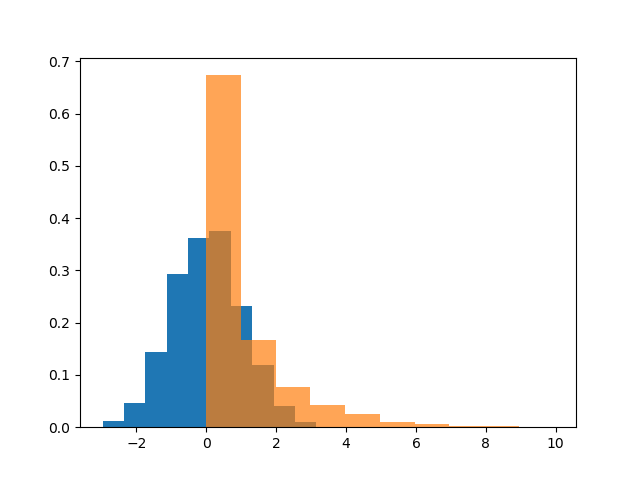

(array([0.67335603, 0.16708087, 0.07649486, 0.04227347, 0.02516278,
        0.01006511, 0.00603907, 0.00301953, 0.00201302, 0.00100651]),
 array([2.49399084e-06, 9.93533365e-01, 1.98706424e+00, 2.98059511e+00,
        3.97412598e+00, 4.96765685e+00, 5.96118772e+00, 6.95471859e+00,
        7.94824946e+00, 8.94178033e+00, 9.93531120e+00]),
 <a list of 10 Patch objects>)

In [29]:
X1 = np.random.normal(loc=0., scale=1, size=1000)
plt.hist(X1, normed=True)
plt.hist(X1**2, normed=True, alpha=0.7)

<IPython.core.display.Javascript object>


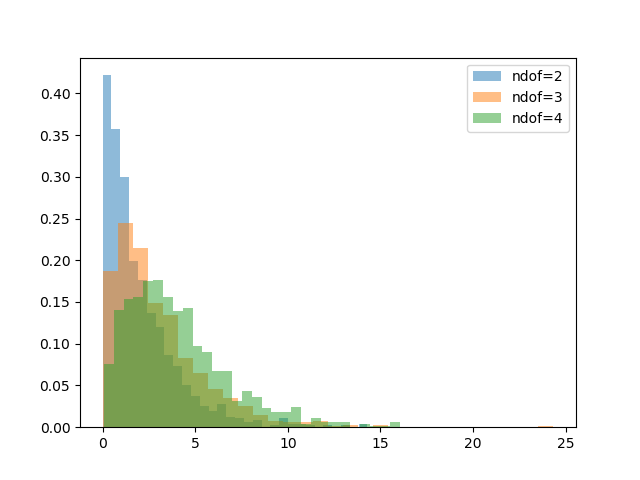

In [30]:
for n in range(2,5):
    Y=0
    for i in range(0,n):
        Xi = np.random.normal(loc=0., scale=1, size=1000)
        Y=Y + Xi**2

    h=plt.hist(Y, normed=True, bins=30, alpha=0.5, label="ndof="+str(n))
    
plt.legend()

## Fischer F distribution
Is used to compare the variance of two populations, simply by dividing one by the other.

$X = \frac{U/m}{V/n}$

Here, U and V are chi-square variables with m and n degrees of freedom, respectively.

Again, more on this in hypothesis testing.

## Student's t distribution (the t-distribution)

William Gosset published this distribution under the pseudonym "Student" in 1908. The statistical methods at the time assumed large sample sizes, which did not approptiately describe the result he obtained from small sample sizes.

The sample mean is $\bar{X} = (X_1 + X_2 + ... X_n)/n$ (approximately normally distributed).
The sample variance is  $S^2 = \frac{1}{n-1}\sum_{i=1}^n(X-\bar{X})^2$

Then, $Z = \frac{(\bar{X}-\mu)}{\sigma/\sqrt{n}}$ follows the standard normal distribuion.

In practical situations, we do not know the true standard deviation of the population, $\sigma$, only $S$.

Gosset found that the proabaility distribution of the related quantity $T = \frac{(\bar{X}-\mu)}{S/\sqrt{n}}$, becomes:

$$ f(t)=\frac{\Gamma[(\nu +1)/2] (1+t^2 /\nu)^{-(\nu+1)/2}} {\sqrt{\pi \nu} \Gamma(\nu /2)} $$

Note that $T$ approaches $Z$ for large sample sizes. 

* The T distribution has heavier tails than the standard normal distribution.
* I.e. the spread of $T$ is larger than the spread of $Z$.

I.e., For small degrees of freedom ($n$), $P(T \leq 2)$ is much larger than $P(Z \leq 2)$, which means that it is more probable to observe large values of the $T$ variable than the $Z$ variable. 

We'll discuss this in more detail when we do hypothesis testing.


## Extreme value distributions

One important motivation for studying and modeling the statistics of extremes is **to estimate annual probabilities of rare and potentially damaging events**, such as extremely large daily precipitation amounts that might cause flooding, or extremely large wind speeds that might cause damage to structures.

* Often extreme-value statistics are of interest because the physical processes generating extreme events, and the societal impacts that occur because of them, are large and unusual

* A typical example of extreme-value data is the collection of annual maximum, or block maximum (largest in a block of $m$ values), daily precipitation values.

* We construct a new time series by selecting only the extreme values. This new time series is _very_ skewed (has a long tail), and the appropriate curves to fit to this data are extreme value distributions.

> ** Extremal Types Theorem:** The largest of $m$ **independent** observations from a fixed distribution will follow the *generalized extreme value (GEV) distribution* increasingly closely as $m$ increases, regardless of the (**single, fixed**) distribution from which the observations have come

The Extremal Types Theorem is analog within the statistics of extremes of the Central Limit Theorem for the distribution of sums converging to the Gaussian distribution.

Three types of extreme value distributions exist, each having a heavy tail:

|       Gumbel                 |         Fréchet                 | Weibull                          |
|------------------------------|---------------------------------|----------------------------------|
|              (Type I)        |                 (Type II)       |         (Type III)               |
| Heavy tail to left and right |Heavy tail to the right (floods) | Heavy tail to the left (low-flow)|
| Annual maximum river flow    |                                 | Low-flow                         |

Gumbel:
$f(x)= \frac{1}{\sigma}e^{-z-e^{-z}}$

where $z = \frac{x-\mu}{\sigma}$

Fréchet:
$f(x)= \frac{\alpha}{\beta}\big(\frac{\beta}{x}\big)^{\alpha+1}e^{-(\beta/x)^\alpha}$,

where $\alpha, \beta > 0$

Weibull:
$f(x)= \frac{\alpha}{\beta}\big(\frac{x}{\beta}\big)^{\alpha-1}e^{-(x/\beta)^\alpha}$,

where $\alpha, \beta > 0$


## Summary:

After this lecture, you should be able to ...

* understand what the central, spread and skewness measures are and how they are defined mathematically
* understand what happens if the mean, standard deviation or skewness is changed.
* understand the difference between the pdf and the cdf.
* be able to calculate probabilities for normally distributed variables.
* understand what the central limit theorem means.
* understand why the normal distribution is used to approximate probabilities for discrete distributions.
* know that the lognormal, Chi square, Student's t, F distribution and three extreme value distributions exist: Gumbel, Fréchet and Weibull.